In [2]:
# Using the tweepy handler to collect the tweets

# Retrieving the consumer key, consumer secret, access token and access secret from the tokens.py File
import Tokens

import tweepy
from tweepy import OAuthHandler
import pandas as pd
import sys
encodingTot = sys.stdout.encoding or 'utf-8'
 
consumer_key = Tokens.consumer_key
consumer_secret = Tokens.consumer_secret
 
access_token = Tokens.access_token
access_secret = Tokens.access_secret
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [3]:
# testing authentication

try:
    api.verify_credentials()
    print("Authentication Successful")
except:
    print("Error during authentication")

Authentication Successful


In [57]:
import datetime
search_terms = ['Vote Cindy', 'Vote Esther', 'Vote Frodd', 'Vote Sir Dee', 'Vote Tacha', 'Vote Venita']

columns = ['id','name', 'tweet', 'retweets_count','location','created','followers_count','geo','hashtags','verified','retweeted']
todays_date = datetime.datetime.now().date()
 
tweetDF = pd.DataFrame(columns=columns)
 
num_tweets = 50

for tweet in tweepy.Cursor(api.search_full_archive,environment_name = "prod", query="elections lang:en",fromDate="202003012315",toDate="202011082315",maxResults="100").items(num_tweets):


    lenDF = len(tweetDF)
 
    tweetDF.loc[lenDF] = [tweet.user.id,tweet.user.screen_name, tweet.text, tweet.retweet_count, tweet.user.location,tweet.created_at.strftime("%d-%b-%Y"),tweet.user.followers_count,tweet.geo,tweet.entities["hashtags"],tweet.user.verified,tweet.retweeted]
         
#tweetDF.to_csv("sampleDF.csv", sep='\t', encoding = encodingTot)
tweetDF.to_csv("2021Tweets.csv",mode='a', sep='\t', encoding = encodingTot,header=False)
 
tweetDF = pd.read_csv(open('2021Tweets.csv','rU'), sep='\t', engine='c')
 
tweetDF.head()

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,geo,hashtags,verified,retweeted
0,0,3084619833,KumasMommy,RT @IndivisibleVent: 🚨HAPPENING NOW!\n\nRepubl...,0,Midwest,20-May-2020,175,NaN,"[{'text': 'COVID', 'indices': [127, 133]}]",False,False
1,1,1209650152094490636,BrynCleat,@barrytobebarry Water Cannon✅\nBlue Indelible ...,0,United Celtic Nations,20-May-2020,1691,NaN,[],False,False
2,2,22076866,lkofman,Cisco is a proud sponsor of The Match: Champio...,0,"San Jose, CA",20-May-2020,268,NaN,[],False,False
3,3,1166810239355801607,avelonia1,Michigan Rep. Karen Whitsett credits #hydroxyc...,0,NaN,20-May-2020,234,NaN,"[{'text': 'hydroxychloroquine', 'indices': [37...",False,False
4,4,109051409,ChrisRBrock,I find it hilarious that everyone doing Skype ...,0,"Columbus, OH",20-May-2020,842,NaN,[],False,False


In [106]:
import pandas as pd
import string
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

def preprocessing(df):
    stemmer=PorterStemmer()
    lmtzr = WordNetLemmatizer()
    
    # putting the tweets into a list
    tweet_list = df['tweet'].tolist()
    
    regex_str = [
     # HTML tags
    r'<[^>]+>', 
    # @-signs
    r'(?:@[\w_]+)',
    # hash-tags
    # r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", 
    # URLs 
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 
    # numbers
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', 
    # words with - and '
    r"(?:[a-z][a-z'\-_]+[a-z])",
    # other words
    # r'(?:[\w_]+)'
    ]
    
    #Regex functions
    emoticons_list = [':)', ';)', '(:', '(;', '}', '{','}']
    # characters to be removed
    char_remove = [']', '[', '(', ')', '{', '}']
    filler_words = ['here', 'there', 'where', 'when', 'would', 'should', 'could','thats', 'youre','thanks', 'hasn','thank', 'https', 'since', 'wanna', 'gonna', 'aint', 'http', 'unto', 'onto', 'into', 'havent','dont', 'done', 'cant', 'werent', 'https', 'u', 'isnt', 'go', 'theyre', 'each', 'every', 'shes', 'youve', 'youll','weve', 'theyve']
   
    repl_dict = {'googleele': 'goog', 'lyin': 'lie', 'googles': 'goog', 'aapl':'apple','msft':'microsoft', 'google': 'goog', 'googl':'goog'}
   
    exclude = list(string.punctuation) + emoticons_list + filler_words
   
    tweet_clean_fin = [] # Cleaned Tweets
    URL = r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+'
    for tweet in tweet_list:
        tw_clean = [ch for ch in tweet if ch not in char_remove]
        tw_clean = ''.join(tw_clean)
        #URL
        tw_clean = re.sub(URL, "", str(tw_clean))
        #HTML
        tw_clean = re.sub(r'<[^>]+>', "",str(tw_clean))
        # Forward slash
        tw_clean = re.sub(r'[/]+',"", str(tw_clean))
        #Back slash
        tw_clean = re.sub(r'[\\]+',"", str(tw_clean))
#         tw_clean = re.sub(cont_number, "",str(tw_clean))
        # Numbers
        tw_clean = re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)', "",str(tw_clean))
        
        tw_clean = re.sub("'", "",str(tw_clean))
        tw_clean = re.sub('"', "",str(tw_clean))
        tw_clean = re.sub('#', "",str(tw_clean))
        tw_clean = re.sub('@', "",str(tw_clean))
        tw_clean = re.sub("rt", "", str(tw_clean))
        tw_clean = re.sub('http', '', str(tw_clean))
        tw_clean = re.sub('https', '',str(tw_clean))

        tw_clean = lmtzr.lemmatize(str(tw_clean))
#         tw_clean = stemmer.stem(str(tw_clean))
        
        tw_clean_lst = re.findall(r'\w+', str(tw_clean))
        tw_clean_lst = [tw.lower() for tw in tw_clean_lst if tw.lower() not in stopwords.words('english')]
        tw_clean_lst = [word for word in tw_clean_lst if word not in exclude]
        tw_clean_lst = str([word for word in tw_clean_lst if len(word)>3])
        tw_clean_lst = re.findall(r'\w+', str(tw_clean_lst))
        tw_clean_lst = [replace_all(word, repl_dict) for word in tw_clean_lst]
        tweet_clean_fin.append(list(tw_clean_lst))
    tweet_clean_fin= [' '.join(item) for item in tweet_clean_fin]
    df['tweet']=tweet_clean_fin
       
    '''
    Return dataframe here
    '''
    return df
    


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/priyanka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
precovid_df= pd.read_csv(open('2019Tweets Jan - May 550.csv','rU',encoding='utf-8'), sep='\t', engine='c')
covid_timeline= pd.read_csv(open('2019Tweets Jan - May 550.csv','rU',encoding='utf-8'), sep='\t', engine='c')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 'U' mode is deprecated
  


In [108]:
precovid_cleaned_df = preprocessing(precovid_df)
covid_timeline_cleaned_df= preprocessing(covid_timeline)


In [109]:
# Removing geo column since it is empty (nan)
del precovid_cleaned_df['geo']
del covid_timeline_cleaned_df['geo']

In [110]:
precovid_cleaned_df.head()

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,0,15795274,tkripas,bother inviting catch coffee networking staing...,0,Chicagoland,29-Jan-2019,1046,[],False,False
1,1,3368318501,MrJLSimpson,cnhsbulldogs cnhs grade parent student night m...,0,"Indiana, USA",29-Jan-2019,206,[],False,False
2,2,576491140,MaryGetzHouses,noticed housing market staing look brighter,0,Southwest IN,29-Jan-2019,245,[],False,False
3,3,3254024678,NVRgonloseGucci,staing real different,0,"Spanish Town🇯🇲Queens NY, ATL",29-Jan-2019,248,[],False,False
4,4,937682714,BGoodAngus,cdnangus staing temple comfoear canadian angus...,0,NaN,29-Jan-2019,1358,[],False,False


In [105]:
covid_timeline_cleaned_df.head()

,Unnamed: 0,id,name,tweet,retweets_count,location,created,followers_count,hashtags,verified,retweeted
0,0,15795274,tkripas,bother inviting catch coffee networking staing...,0,Chicagoland,29-Jan-2019,1046,[],False,False
1,1,3368318501,MrJLSimpson,cnhsbulldogs cnhs grade parent student night m...,0,"Indiana, USA",29-Jan-2019,206,[],False,False
2,2,576491140,MaryGetzHouses,noticed housing market staing look brighter,0,Southwest IN,29-Jan-2019,245,[],False,False
3,3,3254024678,NVRgonloseGucci,staing real different,0,"Spanish Town🇯🇲Queens NY, ATL",29-Jan-2019,248,[],False,False
4,4,937682714,BGoodAngus,cdnangus staing temple comfoear canadian angus...,0,NaN,29-Jan-2019,1358,[],False,False


In [104]:
#del cleaned_df['Unnamed: 0']

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/revanth802/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


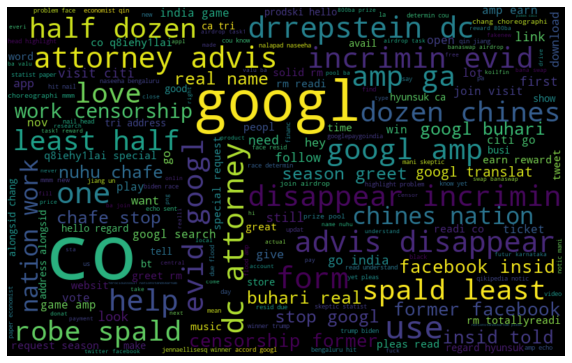

In [15]:
# from textblob import TextBlob
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import re
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from wordcloud import WordCloud

# corpus = []
# for i in range(len(tweetDF)):
#     tweet = re.sub('[^a-zA-Z0-9]', ' ', tweetDF['Tweet'][i])
#     tweet = tweet.lower()
    
#     tweet = tweet.split()
#     ps = PorterStemmer()
#     tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
#     tweet = ' '.join(tweet)
#     corpus.append(tweet)

# #Visualization
# #Word Cloud
# all_words = ' '.join([text for text in corpus])
# wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
# plt.figure(figsize=(10, 7))
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis('off')
# plt.show()